In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('Admission_Predict.csv')

In [4]:
X_linear = data[['GRE Score']].values  # Independent variable
y_linear = data['Chance of Admit '].values  # Dependent variable

In [5]:
X_logistic = data[['GRE Score', 'CGPA']].values  # Two features
y_logistic = (data['Chance of Admit '] > 0.75).astype(int)  # Binary classification

In [6]:
def linear_regression():
    X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    plt.scatter(X_test, y_test, color='blue', label="Actual data")
    plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression line")
    plt.xlabel("GRE Score")
    plt.ylabel("Chance of Admit")
    plt.title("Linear Regression: GRE Score vs Chance of Admit")
    plt.legend()
    plt.show()

In [7]:
def logistic_regression():
    X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    x_min, x_max = X_logistic[:, 0].min() - 5, X_logistic[:, 0].max() + 5
    y_min, y_max = X_logistic[:, 1].min() - 0.5, X_logistic[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='o', label="Test data")
    plt.xlabel("GRE Score")
    plt.ylabel("CGPA")
    plt.title("Logistic Regression Decision Boundary")
    plt.legend()
    plt.show()

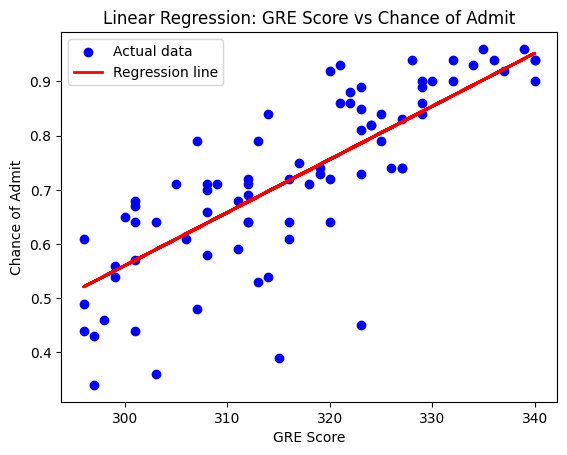

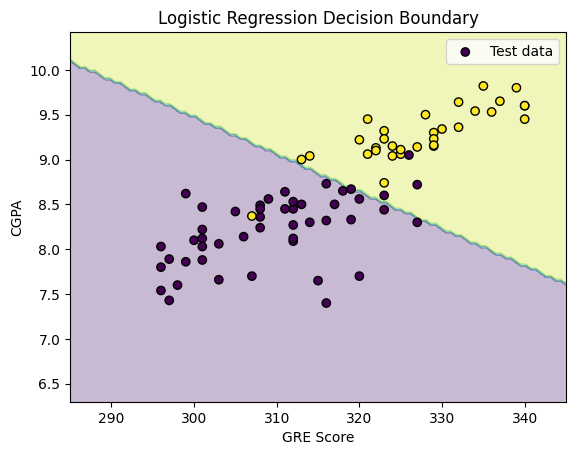

In [8]:
linear_regression()
logistic_regression()